In [1]:
%include "EnableIPythonDisplay.swift"
print(Python.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [2]:
import Foundation
import TensorFlow

struct Complex {
    var real: Double
    var imag: Double
    init(_ r: Double, _ i: Double) {
        self.real = r
        self.imag = i
    }
}
extension Complex {
    public static func +(_ a: Self, _ b: Self) -> Self {
        return Self(a.real + b.real, a.imag + b.imag)
    }
    public static func -(_ a: Self, _ b: Self) -> Self {
        return Self(a.real - b.real, a.imag - b.imag)
    }
    public static func *(_ a: Self, _ b: Self) -> Self {
        return Self(a.real * b.real - a.imag * b.imag, a.real * b.imag + a.imag * b.real)
    }
    public var abs: Double {
        return pow(self.real * self.real + self.imag * self.imag, 0.5)
    }
}

func iter(_ c: Complex) -> Int {
    let lim = 255
    let bound = 10000.0
    var z = Complex(0, 0)
    for i in 0..<lim {
        z = z * z + c
        if z.abs > bound {
            return i
        }
    }
    return lim
}

let n = 3000
var all_vals = [Tensor<UInt8>]()
let inv_n = 1.0 / Double(n)
for i in 0...n {
    let real = Double(i - n / 2) * inv_n
    var vals = [UInt8]()
    for j in 0...n {
        let imag = Double(j - n / 2) * inv_n
        vals.append(UInt8(iter(Complex(real, imag))))
    }
    all_vals.append(Tensor<UInt8>(vals))
}

let tensor = Tensor<UInt8>(all_vals)

//print((Complex(2, 3) * Complex(4, 5)).abs)

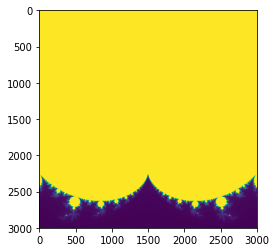

None


In [3]:
%include "EnableIPythonDisplay.swift"
let plt = Python.import("matplotlib.pyplot")
IPythonDisplay.shell.enable_matplotlib("inline")
let fig = plt.figure()
plt.imshow(tensor.makeNumpyArray())
plt.show()
fig.savefig("t.png")